## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

## Reading the Dataset

In [2]:
data = pd.read_excel('dataset/online_retail_II.xlsx',sheet_name='Year 2009-2010')
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
data.shape

(525461, 8)

Inference: The dataset contains 8 Features and 525461 data points.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


inference: The Invoice Date is Object type which should be converted to datetime.

In [6]:
data['InvoiceDate'].unique()

array(['2009-12-01T07:45:00.000000000', '2009-12-01T07:46:00.000000000',
       '2009-12-01T09:06:00.000000000', ...,
       '2010-12-09T19:28:00.000000000', '2010-12-09T19:32:00.000000000',
       '2010-12-09T20:01:00.000000000'], dtype='datetime64[ns]')

In [7]:
#Converting the Invoice Date into datetime format

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'],dayfirst=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [9]:
#Removing the time from the Invoice Date feature

data['InvoiceDate'] = [d.date() for d in data['InvoiceDate']]

In [11]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom


## Checking for Null Values

In [15]:
data.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [17]:
data.dropna(inplace=True) #Dropping Null values

In [18]:
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [19]:
data.shape

(417534, 8)

Inference: After the Null values are removed, the data points are reduced to 417534.

In [20]:
data['Price'][data['Price']==0].value_counts()

0.0    31
Name: Price, dtype: int64

In [21]:
data.drop(data[data['Price']<=0].index,inplace=True)

In [23]:
data['Quantity'][data['Quantity']<=0] #Checking for -ve Quantity

178      -12
179       -6
180       -4
181       -6
182      -12
          ..
524695    -2
524696    -4
524697    -1
524698    -1
525282    -1
Name: Quantity, Length: 9839, dtype: int64

In [24]:
data.drop(data[data['Quantity']<=0].index,inplace=True)

Inference: The data points with 0 Quantity are removed.

In [25]:
data.shape

(407664, 8)

In [26]:
data[data['StockCode']=='POST']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01,18.0,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01,141.0,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01,130.0,12362.0,Belgium
625,489526,POST,POSTAGE,6,2009-12-01,18.0,12533.0,Germany
1244,489557,POST,POSTAGE,4,2009-12-01,18.0,12490.0,France
...,...,...,...,...,...,...,...,...
522916,537967,POST,POSTAGE,1,2010-12-09,18.0,12494.0,France
522930,537995,POST,POSTAGE,2,2010-12-09,18.0,12712.0,Germany
522974,538003,POST,POSTAGE,8,2010-12-09,18.0,12429.0,Denmark
523064,538008,POST,POSTAGE,5,2010-12-09,18.0,12683.0,France


## Removing invalid Stock Codes

In [27]:
rmv = ['POST','M','DOT','B','S','AMAZONFEE','BANK CHARGES','gift_0001_10','gift_0001_20','gift_0001_30','gift_0001_40','gift_0001_50']
for i in rmv:
    data.drop(data[data['StockCode']==i].index, inplace=True)

In [28]:
data.shape

(406481, 8)

In [29]:
data.describe()

,Quantity,Price,Customer ID
count,406481.000000,406481.000000,406481.000000
mean,13.613163,3.016563,15373.400033
std,96.979046,4.611700,1677.252462
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,14006.000000
50%,5.000000,1.950000,15325.000000
75%,12.000000,3.750000,16814.000000
max,19152.000000,387.540000,18287.000000


In [30]:
data['Quantity'][data.Quantity<100].count()

399771

# Feature Engineering :

## Creating a Revenue feature

In [31]:
data['Revenue']= data['Quantity'] * data['Price']

In [32]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,30.0


## Revenue generated from each Customer

In [33]:
revenue = data['Revenue'].groupby(data['Customer ID']).sum().reset_index()
revenue

,Customer ID,Revenue
0,12346.0,372.86
1,12347.0,1323.32
2,12348.0,221.16
3,12349.0,2221.14
4,12351.0,300.93
...,...,...
4291,18283.0,641.77
4292,18284.0,461.68
4293,18285.0,427.00
4294,18286.0,1296.43


In [34]:
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
Revenue        0
dtype: int64

In [36]:
revenue_data = revenue.sort_values(by=['Revenue'],ascending=False)
revenue_data.head(10)

,Customer ID,Revenue
4167,18102.0,349164.35
1629,14646.0,247613.50
1264,14156.0,188388.29
1829,14911.0,144127.25
935,13694.0,131443.19
3729,17511.0,84541.17
1940,15061.0,83282.93
3114,16684.0,80489.21
3163,16754.0,65500.07
503,13089.0,57912.03


In [38]:
rv = revenue_data.head(20)

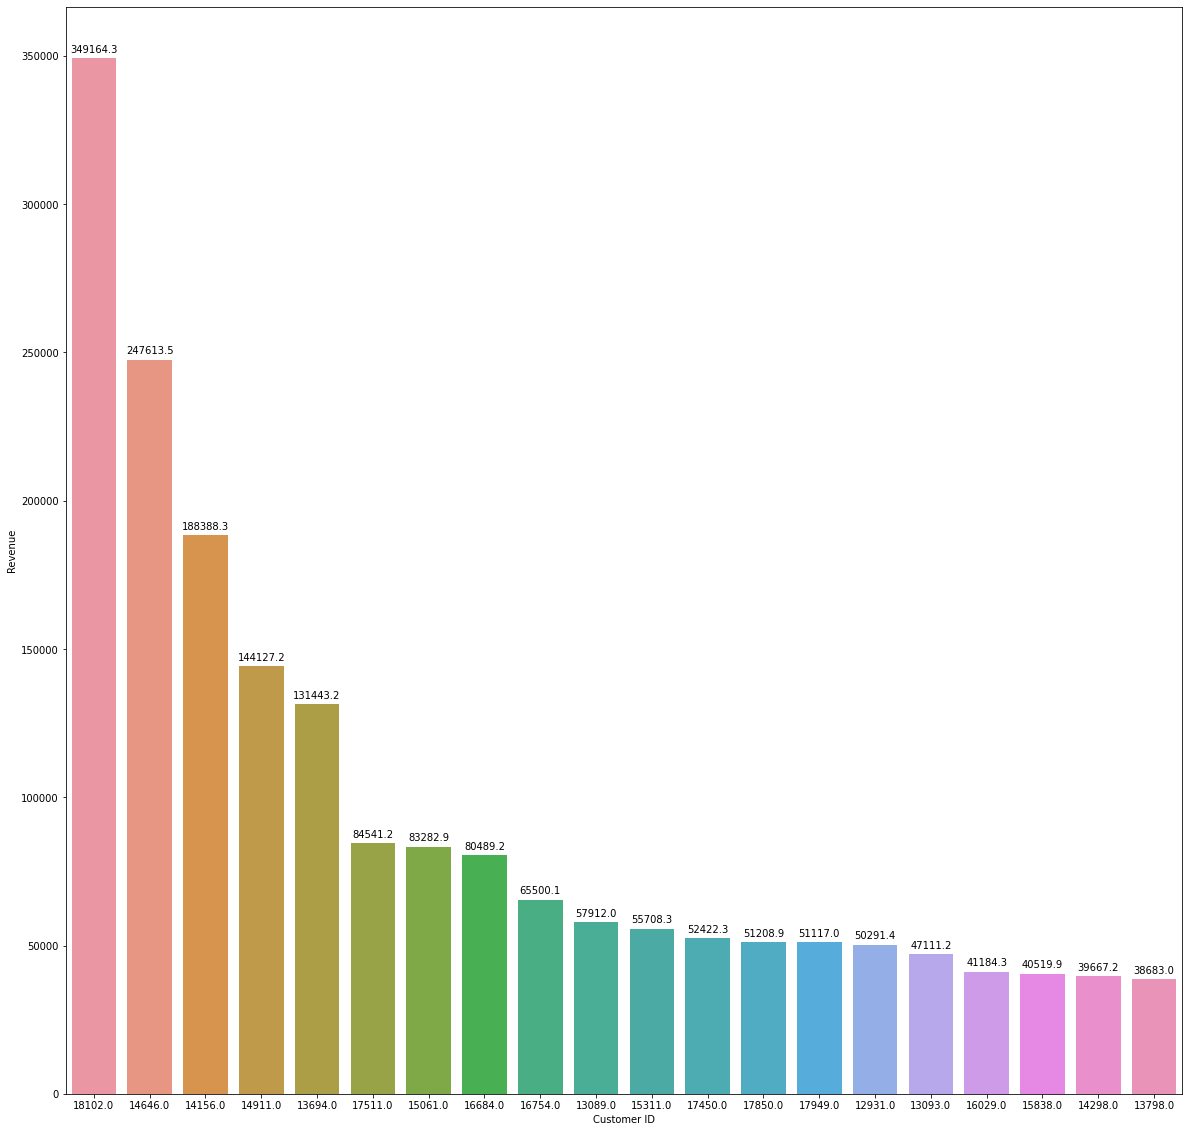

In [40]:
plt.figure(figsize=(20,20))
rev = sns.barplot(x='Customer ID',y='Revenue',data=rv,order=rv.sort_values('Revenue',ascending=False)['Customer ID'])

for p in rev.patches:
    rev.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

Inference:

1. These are the top 10 revenue-generating customers out of 4296 and the customers 18102 and 14646 being the highest among all.

2. The revenue ranges from 349K to 57K for the top ten customers. 


## Calculating the Variety of products purchased by each Customer

In [41]:
# New Attribute : Frequency

products = data.groupby('Customer ID')['Invoice'].count()
products= products.reset_index()
products.columns = ['Customer ID', 'Tot_Trans']
products

,Customer ID,Tot_Trans
0,12346.0,33
1,12347.0,71
2,12348.0,19
3,12349.0,100
4,12351.0,21
...,...,...
4291,18283.0,230
4292,18284.0,28
4293,18285.0,12
4294,18286.0,67


In [42]:
tot_t = products.sort_values('Tot_Trans',ascending=False)
tot_t.head(10)

,Customer ID,Tot_Trans
1829,14911.0,5552
3973,17841.0,5042
1598,14606.0,3857
1264,14156.0,2643
249,12748.0,2615
3980,17850.0,2499
3020,16549.0,2269
2121,15311.0,2052
1629,14646.0,1759
1537,14527.0,1727


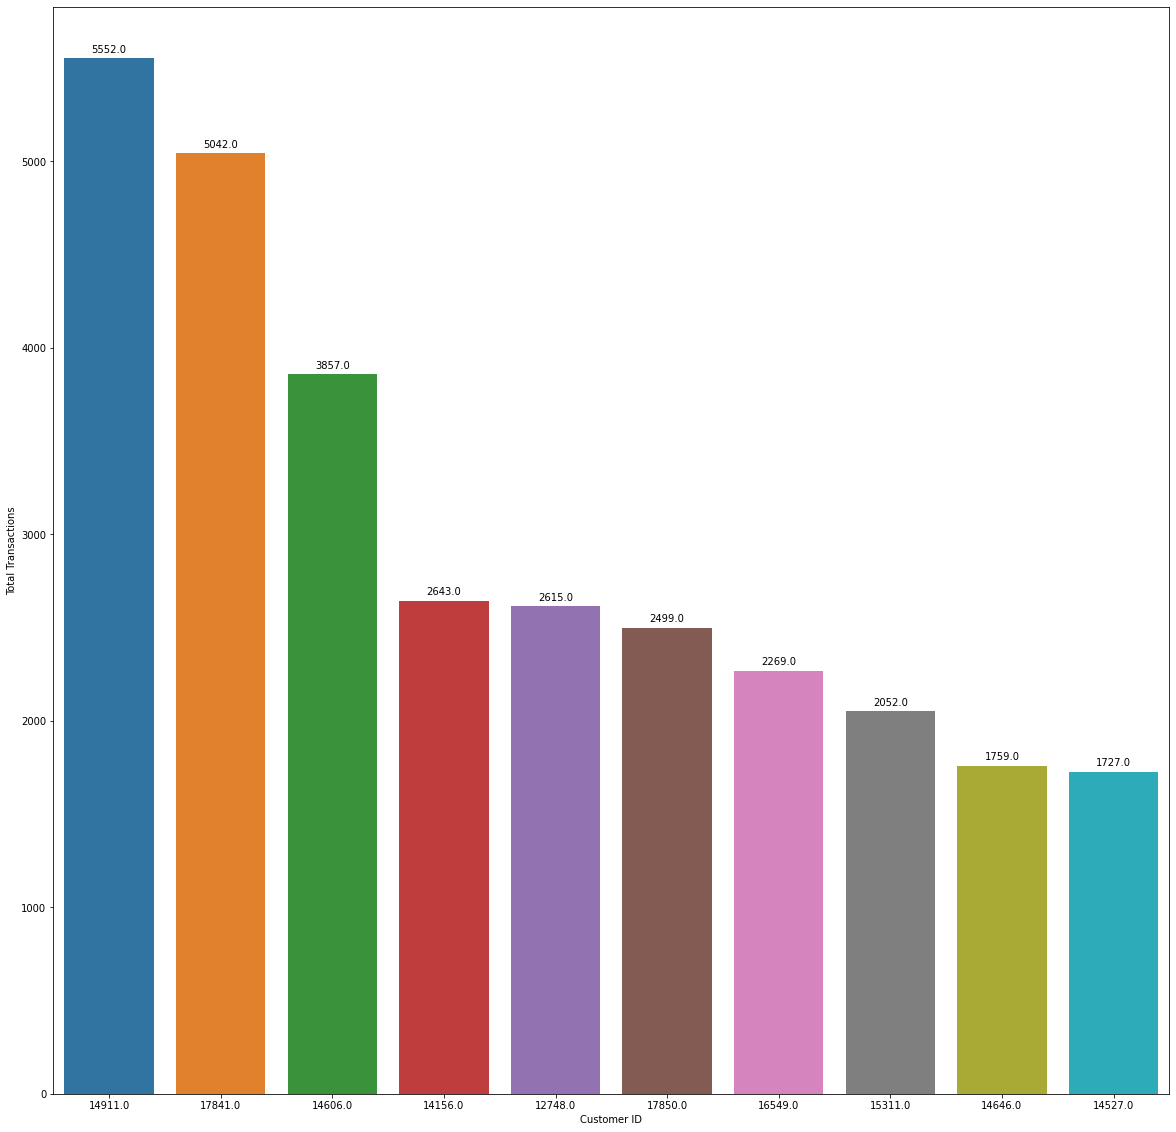

In [43]:
plt.figure(figsize=(20,20))
tt = sns.barplot(x='Customer ID', y='Tot_Trans', data=tot_t.head(10),order=tot_t.head(10).sort_values('Tot_Trans',ascending=False)['Customer ID'])
plt.ylabel('Total Transactions')

for p in tt.patches:
    tt.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

Inference:

1. These top 10 customers are repeat purchasers.  The range is from 5K to 1.7K.
2. We may say a decent number of buyers may belong to a cluster of repeat buyers.
3. The sum of the number of transactions made by the purchaser in the whole year gives us an idea as to how regular the customer is.


In [44]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4296 entries, 0 to 4295
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  4296 non-null   float64
 1   Tot_Trans    4296 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 67.2 KB


## Calculating the frequency of purchase per year

In [45]:
data['Invoice_Month'] = data['InvoiceDate'].dt.strftime('%B')
data['Invoice_Year'] = data['InvoiceDate'].dt.year

In [46]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Invoice_Month,Invoice_Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,83.4,December,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0,December,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0,December,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,100.8,December,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,30.0,December,2009


In [48]:
# Yearly Frequency

year_frequency = data.groupby('Invoice_Year')['Invoice'].count()
year_frequency = year_frequency.reset_index()
year_frequency.columns = ['Invoice_Year', 'Frequency']
year_frequency

,Invoice_Year,Frequency
0,2009,30702
1,2010,375779


## Calculating the frequency of purchase per month in a particular year

In [49]:
# Monthly Frequency - For the year 2010

monthly_frequency = data[data['Invoice_Year']==2009].groupby('Invoice_Month')['Invoice'].count()
monthly_frequency = monthly_frequency.reset_index()
monthly_frequency.columns = ['Month', 'Frequency']
monthly_frequency

,Month,Frequency
0,December,30702


In [50]:
# Monthly Frequency - For the year 2011

monthly_frequency = data[data['Invoice_Year']==2010].groupby('Invoice_Month')['Invoice'].count()
monthly_frequency = monthly_frequency.reset_index()
monthly_frequency.columns = ['Month', 'Frequency']
mf = monthly_frequency.sort_values(by = 'Frequency',ascending = False)
mf

,Month,Frequency
9,November,60154
10,October,49430
11,September,34476
7,March,32172
6,June,31107
8,May,28568
0,April,27133
5,July,26947
1,August,26323
3,February,23291


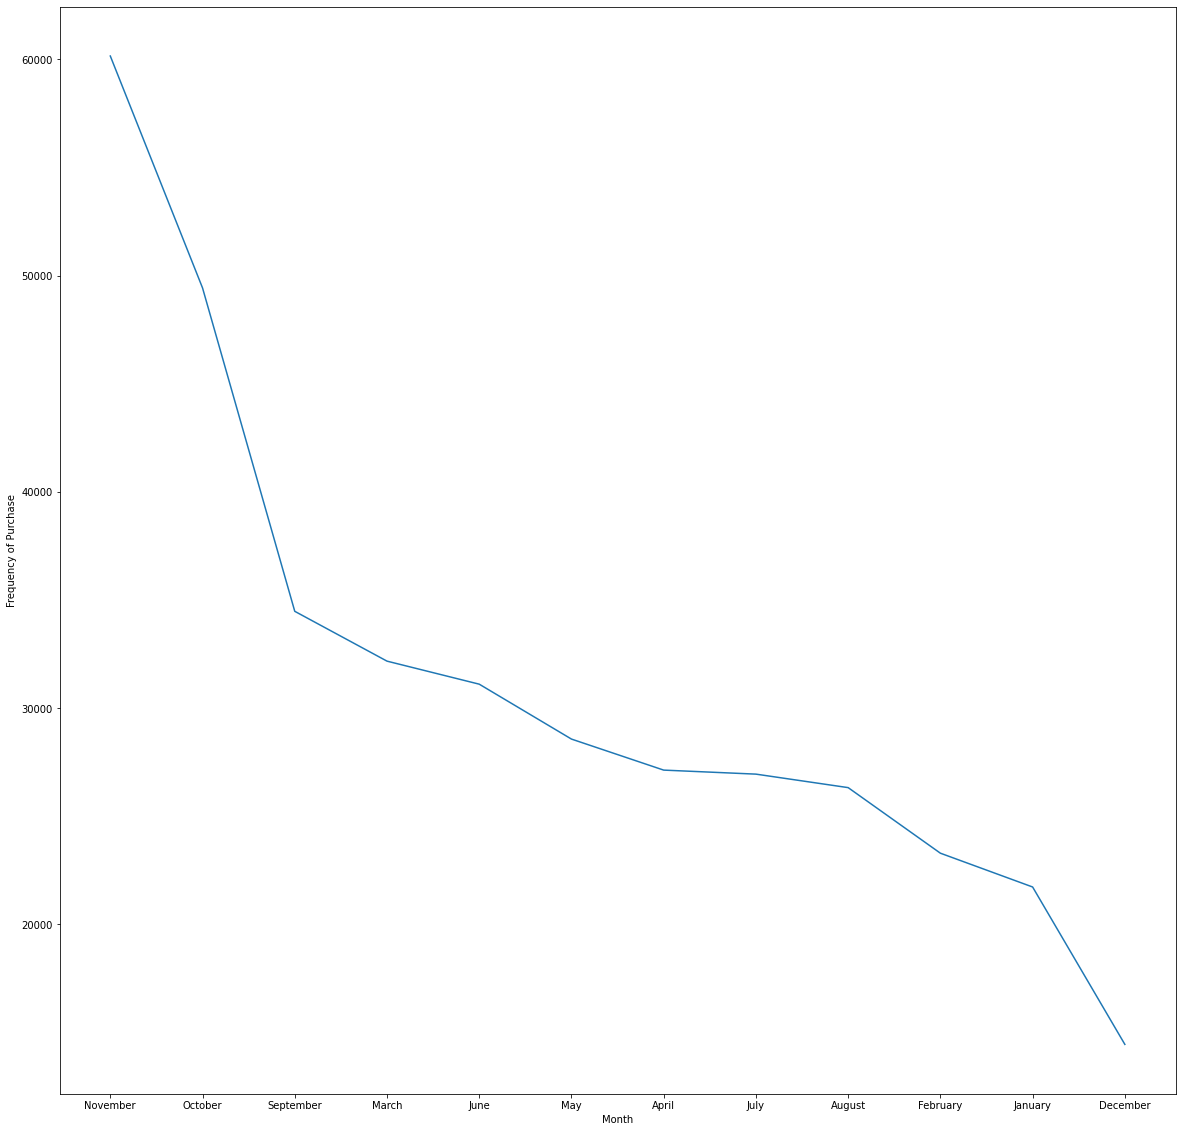

In [51]:
plt.figure(figsize=(20,20))
sns.lineplot(x='Month', y='Frequency',data=mf)
plt.ylabel('Frequency of Purchase')
plt.show()

Inference:

1. We can see that the number of products purchased is high in the month of November. With Thanksgiving and Christmas around the corner, the sales of gift items skyrocket’s in this month.
2. The shopkeepers purchase in bulk to keep their stocks ready for the two festivals and have some leftover for the subsequent months, hence we see a sharp dip right after November.


In [56]:
# We observe that November has the highest amount of transactions. The shop is a custom gift shop and thus has a very high amount of buyers during the christmas season.
# The months after the peak see a dramatic fall in purchases. Most purchasers are dealers of gift items that already have their stocks full and loaded and this runs out slowly. 


## Total Quantity of purchase per customer

In [52]:
tot_quantity = data['Quantity'].groupby(data['Customer ID']).sum().reset_index()
tot_quantity.sort_values(by = 'Quantity')

,Customer ID,Quantity
81,12466.0,1
1007,13788.0,1
4249,18227.0,1
3637,17378.0,1
40,12404.0,1
...,...,...
1264,14156.0,108102
4167,18102.0,124216
935,13694.0,125893
1629,14646.0,170228


In [53]:
tot_quantity['Quantity'][tot_quantity.Quantity<100].count()

630

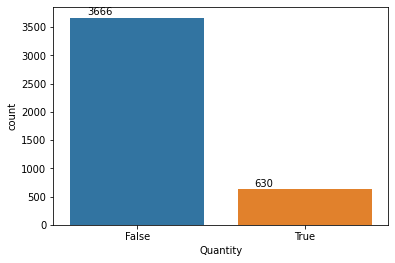

In [57]:
x = sns.countplot(tot_quantity.Quantity<100)
for p in x.patches:
        x.annotate('{}'.format(p.get_height()), (p.get_x()+0.1 ,p.get_height()+50))

In [58]:
tot_q = tot_quantity.sort_values(by = 'Quantity',ascending=False)
tot_q

,Customer ID,Quantity
1086,13902.0,220596
1629,14646.0,170228
935,13694.0,125893
4167,18102.0,124216
1264,14156.0,108102
...,...,...
135,12555.0,1
1926,15040.0,1
3637,17378.0,1
4249,18227.0,1


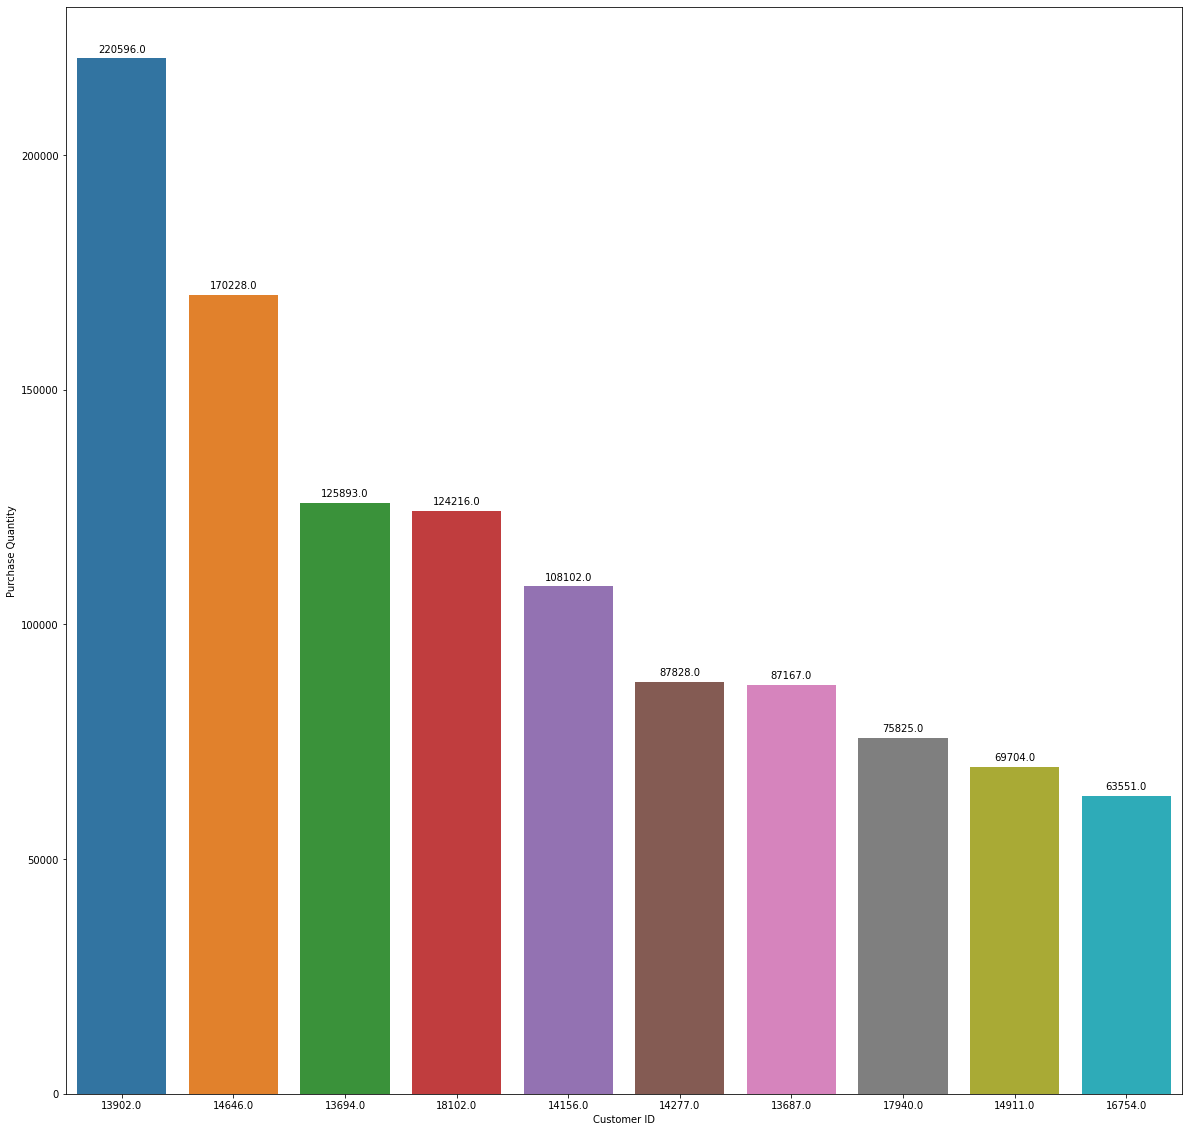

In [59]:
plt.figure(figsize=(20,20))
quan = sns.barplot(x = 'Customer ID',y='Quantity',data=tot_q.head(10),order=tot_q.head(10).sort_values('Quantity',ascending=False)['Customer ID'])
plt.ylabel('Purchase Quantity')

for p in quan.patches:
    quan.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Repeat Buyers

In [61]:

uniquedates = data.groupby('Customer ID')['InvoiceDate'].nunique()
uniquedates= uniquedates.reset_index()

uniquedates.columns = ['Customer ID', 'Retention']
uniquedates

,Customer ID,Retention
0,12346.0,7
1,12347.0,2
2,12348.0,1
3,12349.0,2
4,12351.0,1
...,...,...
4291,18283.0,5
4292,18284.0,1
4293,18285.0,1
4294,18286.0,2


In [62]:
uniquedates['Retention'].max()

124

In [63]:
ret = uniquedates.sort_values('Retention',ascending=False)
ret.head(10)

,Customer ID,Retention
1829,14911.0,124
2121,15311.0,110
1598,14606.0,92
249,12748.0,91
3973,17841.0,85
1264,14156.0,76
1537,14527.0,69
503,13089.0,68
3636,17377.0,51
4059,17961.0,50


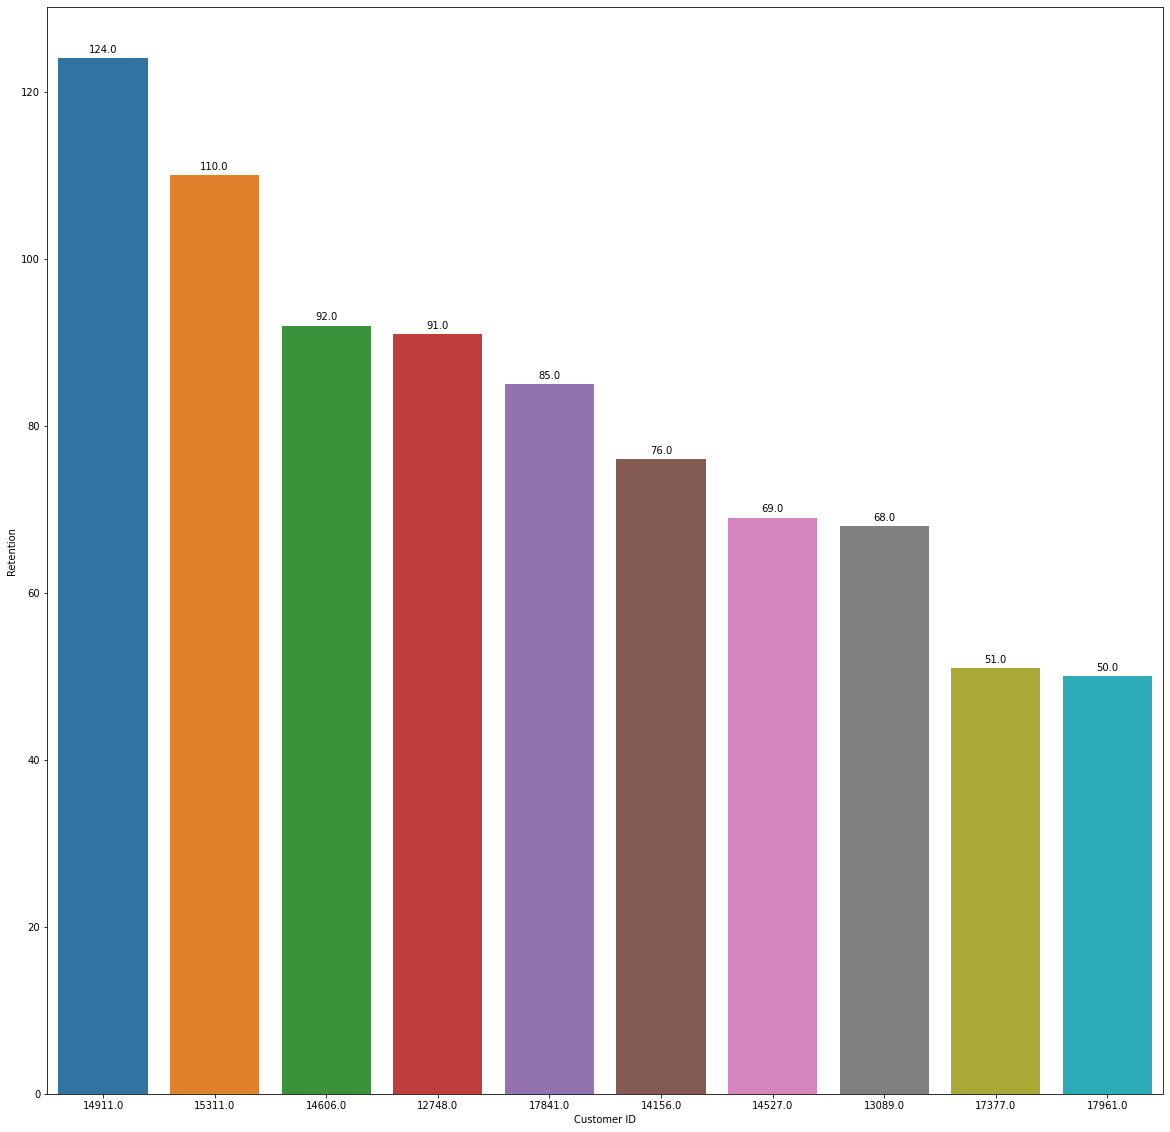

In [64]:
plt.figure(figsize=(20,20))
ret = sns.barplot(x='Customer ID', y='Retention', data=ret.head(10),order=ret.head(10).sort_values('Retention',ascending=False)['Customer ID'])


for p in ret.patches:
    ret.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Unique Products Purchased

In [65]:
prod_var = data.groupby('Customer ID')['StockCode'].nunique()
prod_var= prod_var.reset_index()
prod_var.columns = ['Customer ID', 'uniqueproducts']
prod_var

,Customer ID,uniqueproducts
0,12346.0,26
1,12347.0,70
2,12348.0,19
3,12349.0,89
4,12351.0,21
...,...,...
4291,18283.0,158
4292,18284.0,28
4293,18285.0,12
4294,18286.0,67


In [66]:
unq_pr = prod_var.sort_values('uniqueproducts',ascending=False)
unq_pr.head(10)

,Customer ID,uniqueproducts
1829,14911.0,1739
3973,17841.0,1508
249,12748.0,1340
1264,14156.0,1093
1598,14606.0,1084
1372,14298.0,712
935,13694.0,654
3020,16549.0,646
1629,14646.0,605
2121,15311.0,593


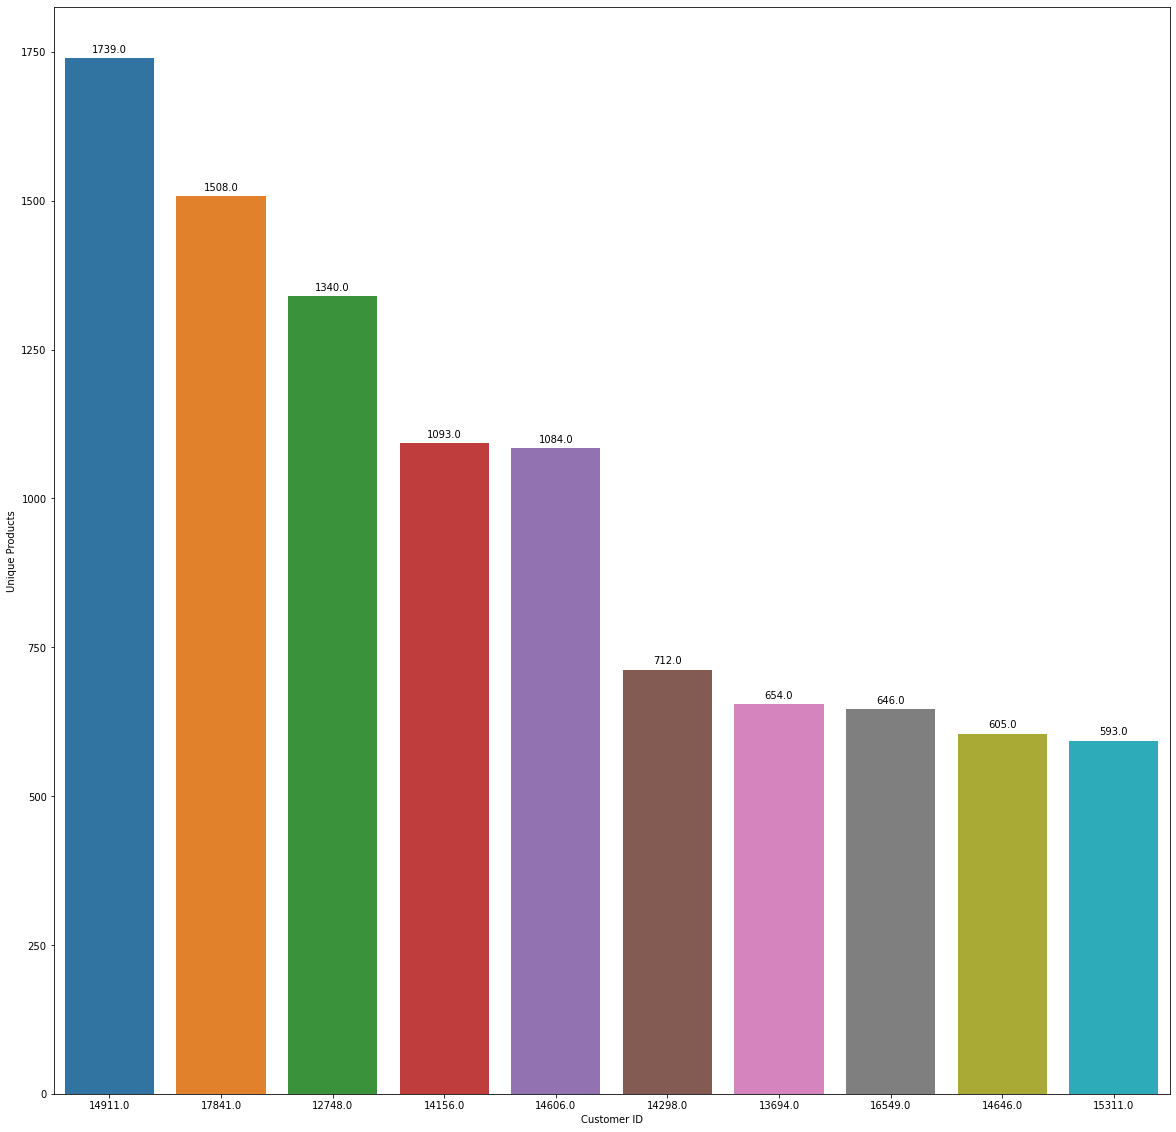

In [67]:
plt.figure(figsize=(20,20))
unip = sns.barplot(x='Customer ID', y='uniqueproducts', data=unq_pr.head(10),order=unq_pr.head(10).sort_values('uniqueproducts',ascending=False)['Customer ID'])
plt.ylabel('Unique Products')

for p in unip.patches:
    unip.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [69]:
loc = data['Country'].groupby(data['Customer ID'])


In [70]:

cdata= pd.merge(revenue,products, on='Customer ID', how='inner')
cdata.columns = ['Customer ID', 'Revenue', 'Tot_Trans']
cdata.head()
cdata2= pd.merge(tot_quantity,uniquedates, on='Customer ID', how='inner')
cdata2.head()
cdata3 = pd.merge(prod_var,cdata2,on='Customer ID')
#cdata4 = pd.merge(cdata3,loc,on = 'CustomerID')

csdata = pd.merge(cdata,cdata3,on = 'Customer ID',how = 'inner')
csdata

,Customer ID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention
0,12346.0,372.86,33,26,70,7
1,12347.0,1323.32,71,70,828,2
2,12348.0,221.16,19,19,372,1
3,12349.0,2221.14,100,89,991,2
4,12351.0,300.93,21,21,261,1
...,...,...,...,...,...,...
4291,18283.0,641.77,230,158,336,5
4292,18284.0,461.68,28,28,494,1
4293,18285.0,427.00,12,12,145,1
4294,18286.0,1296.43,67,67,608,2


In [71]:
csdata1 = csdata.drop('Customer ID',axis=1)

In [72]:
csdata1.describe()

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention
count,4296.000000,4296.000000,4296.000000,4296.000000,4296.000000
mean,2021.508742,94.618482,63.760940,1288.056797,3.932263
std,8825.165646,201.929237,85.742484,6469.794566,5.961250
min,2.950000,1.000000,1.000000,1.000000,1.000000
25%,307.187500,18.000000,17.000000,160.000000,1.000000
50%,695.600000,44.000000,38.000000,385.000000,2.000000
75%,1702.350000,102.250000,79.000000,1000.000000,4.000000
max,349164.350000,5552.000000,1739.000000,220596.000000,124.000000


In [73]:
correl_cs = csdata1.corr()
correl_cs

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention
Revenue,1.000000,0.481192,0.411633,0.776661,0.568022
Tot_Trans,0.481192,1.000000,0.905409,0.364857,0.802867
uniqueproducts,0.411633,0.905409,1.000000,0.325392,0.700445
Quantity,0.776661,0.364857,0.325392,1.000000,0.437002
Retention,0.568022,0.802867,0.700445,0.437002,1.000000


<AxesSubplot:>

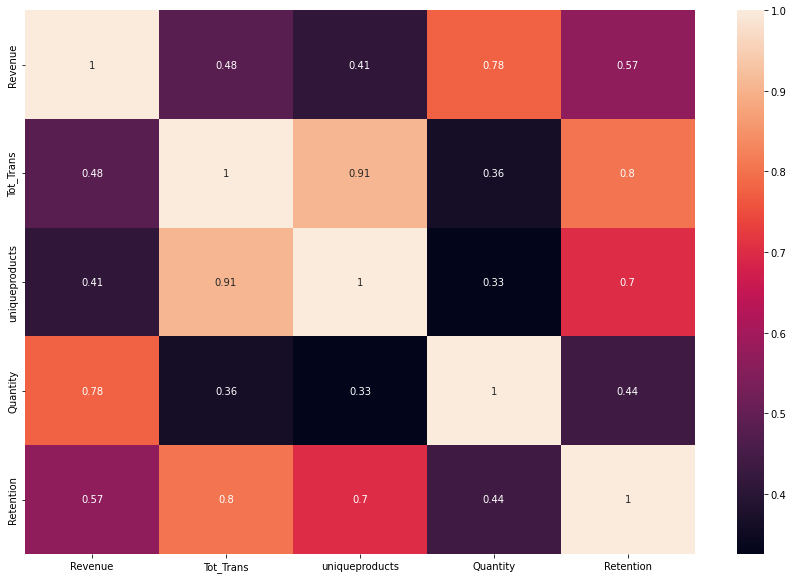

In [74]:
plt.figure(figsize=(15,10))
sns.heatmap(correl_cs,annot = True)

In [75]:
repeatpurchasers = 373/csdata.Retention
rr = repeatpurchasers.round()
Purchase_table = pd.DataFrame(rr.value_counts())
Purchase_table

,Retention
373.0,1486
186.0,843
124.0,539
93.0,372
75.0,232
62.0,170
53.0,153
47.0,100
41.0,65
37.0,62


<AxesSubplot:xlabel='Retention', ylabel='Density'>

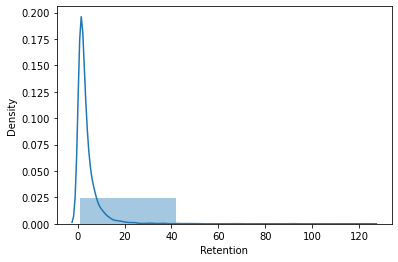

In [82]:
sns.distplot(csdata.Retention,bins = 3)

/Users/nakshathru/Documents/ML-Algos/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


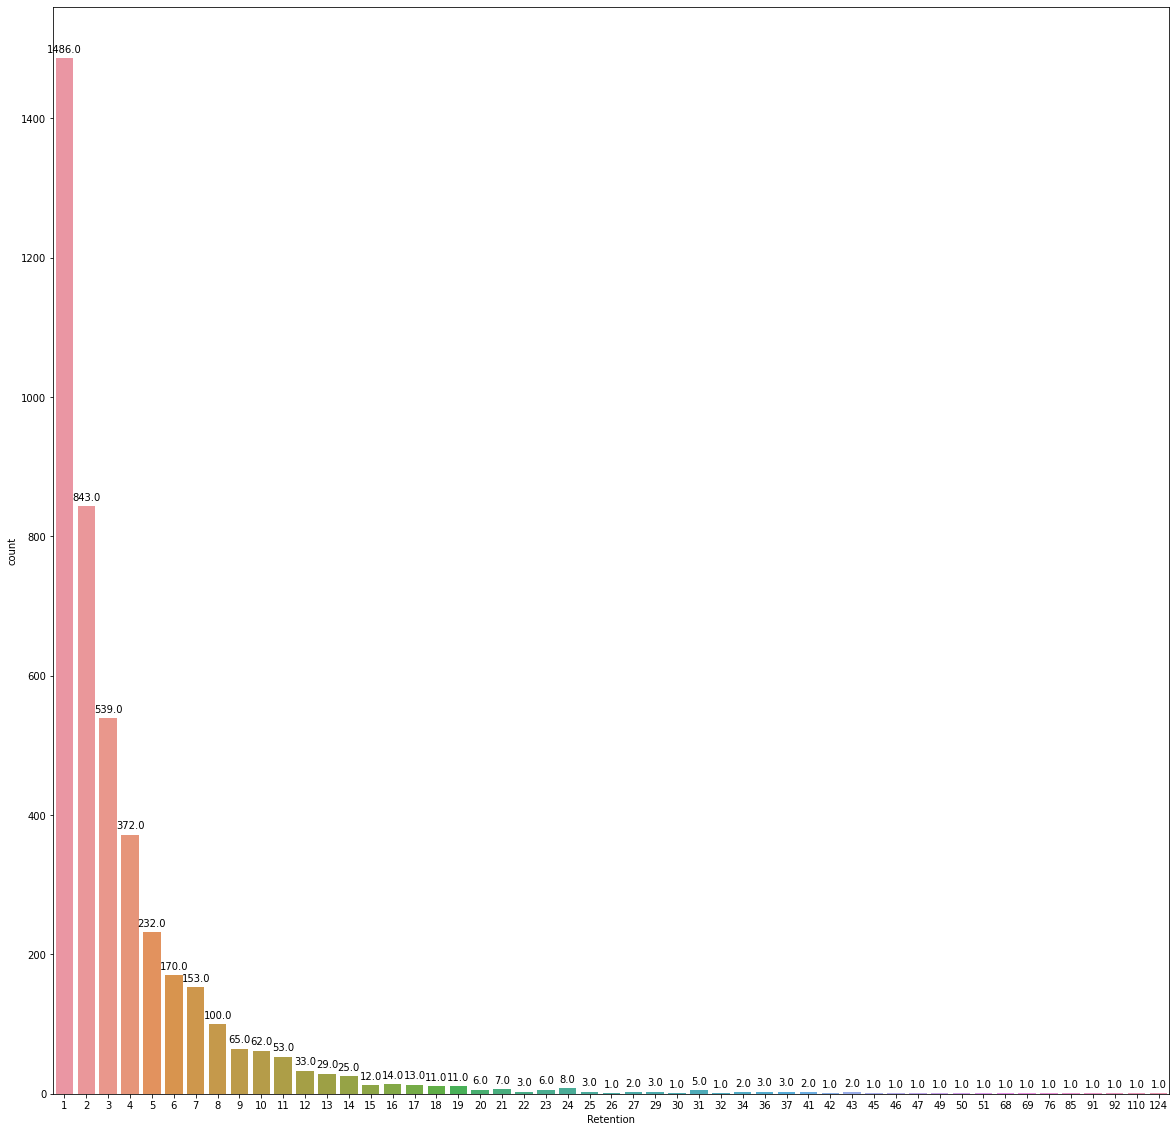

In [88]:
plt.figure(figsize=(20,20))
retn = sns.countplot(csdata.Retention)

for p in retn.patches:
    retn.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [93]:
csdata['Customer ID'][csdata.Revenue == csdata.Revenue.max()]

4167    18102.0
Name: Customer ID, dtype: float64

In [100]:
csdata.head()

,Customer ID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention
0,12346.0,372.86,33,26,70,7
1,12347.0,1323.32,71,70,828,2
2,12348.0,221.16,19,19,372,1
3,12349.0,2221.14,100,89,991,2
4,12351.0,300.93,21,21,261,1


In [144]:
csdata_clean = csdata.drop('Customer ID',axis = 1)
csdata_clean.head()

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention
0,372.86,33,26,70,7
1,1323.32,71,70,828,2
2,221.16,19,19,372,1
3,2221.14,100,89,991,2
4,300.93,21,21,261,1


# Scaling the data before modelling

In [136]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()

In [210]:
csdata_clean['Retention']=csdata_clean['Revenue'].astype(int)
X=csdata_clean
y = csdata_clean['Retention'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Model Building

# Clustering

## Iteration 1

#### K-Means

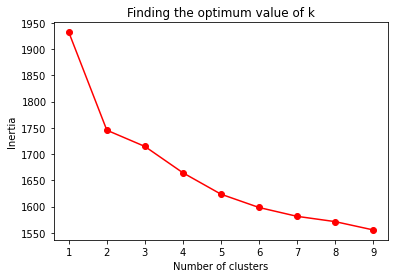

In [217]:
import warnings
warnings.filterwarnings("ignore")
wcss = []
for k in range (1,10):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    wcss.append(np.mean(y_pred))
    
# Visualization of k values:

plt.plot(range(1,10), wcss, color='red',marker = 'o')
plt.title('Finding the optimum value of k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [218]:
wcss

[1932.0969743987587,
 1745.55391776571,
 1714.6190845616757,
 1664.4313421256788,
 1623.6982156710628,
 1598.3584173778122,
 1581.5252133436773,
 1571.4623739332817,
 1555.66718386346]